##READ ME
The following jupyter notebook contain all th visualisations and insights of my project ( heart disease )

 After each dashboard, we have a brief interpretation and importance of the tagged dashboard ,i'm avalaible for futher understanding

## ENJOY IT !!
annexe1 (dataset description) : https://archive.ics.uci.edu/dataset/45/heart+disease

annexe2 (PCA explanation) : https://www.youtube.com/watch?v=FgakZw6K1QQ&pp=ygUDcGNh



##LOADING THE DATASET

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
import pandas as pd
df = pd.concat([X, y], axis=1)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


##pre processing : handling missing values and duplicates

In [ ]:
missing_values = df.isnull().sum()

# Print the missing value counts
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

1. **mode imputation** will be the best choice to handle missing values for **Ca and thal** due to it **description,categorical nature and absence values of less than 5% of dataset**

In [ ]:
ca_mode = df['ca'].mode()[0]

thal_mode = df['thal'].mode()[0]

# Fill missing values in 'ca' and 'thal' columns with their respective modes
df['ca'].fillna(ca_mode, inplace=True)
df['thal'].fillna(thal_mode, inplace=True)

Binarising our target to ease visualisation **0 for 0, {1,2,3,4} for 1** as describe on the context of our dataset








In [ ]:
df['num'] = df['num'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

##Exploratory Data Analysis

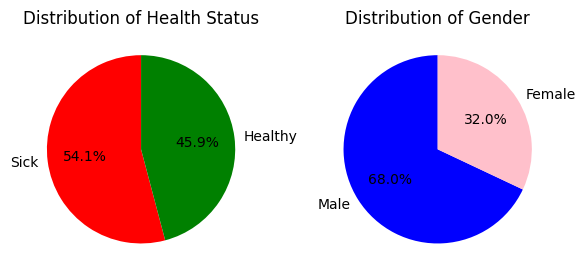

In [ ]:
import matplotlib.pyplot as plt

# Data for the first pie chart (Health Status)
health_status_counts = df['num'].value_counts()
labels_health_status = ['Sick', 'Healthy']
colors_health_status = ['red', 'green']

# Data for the second pie chart (Gender)
gender_counts = df['sex'].value_counts()
labels_gender = ['Male', 'Female']
colors_gender = ['blue', 'pink']

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# Plot the first pie chart (Health Status)
axes[0].pie(health_status_counts, labels=labels_health_status, colors=colors_health_status, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Health Status')

# Plot the second pie chart (Gender)
axes[1].pie(gender_counts, labels=labels_gender, colors=colors_gender, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Gender')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()


**Interpreatation :** plotting these two pie chart , we can compare the distributions of health status and gender within our dataset . This visualization can help in understanding the composition of our dataset and identifying any imbalances or patterns in the distributions of these variables

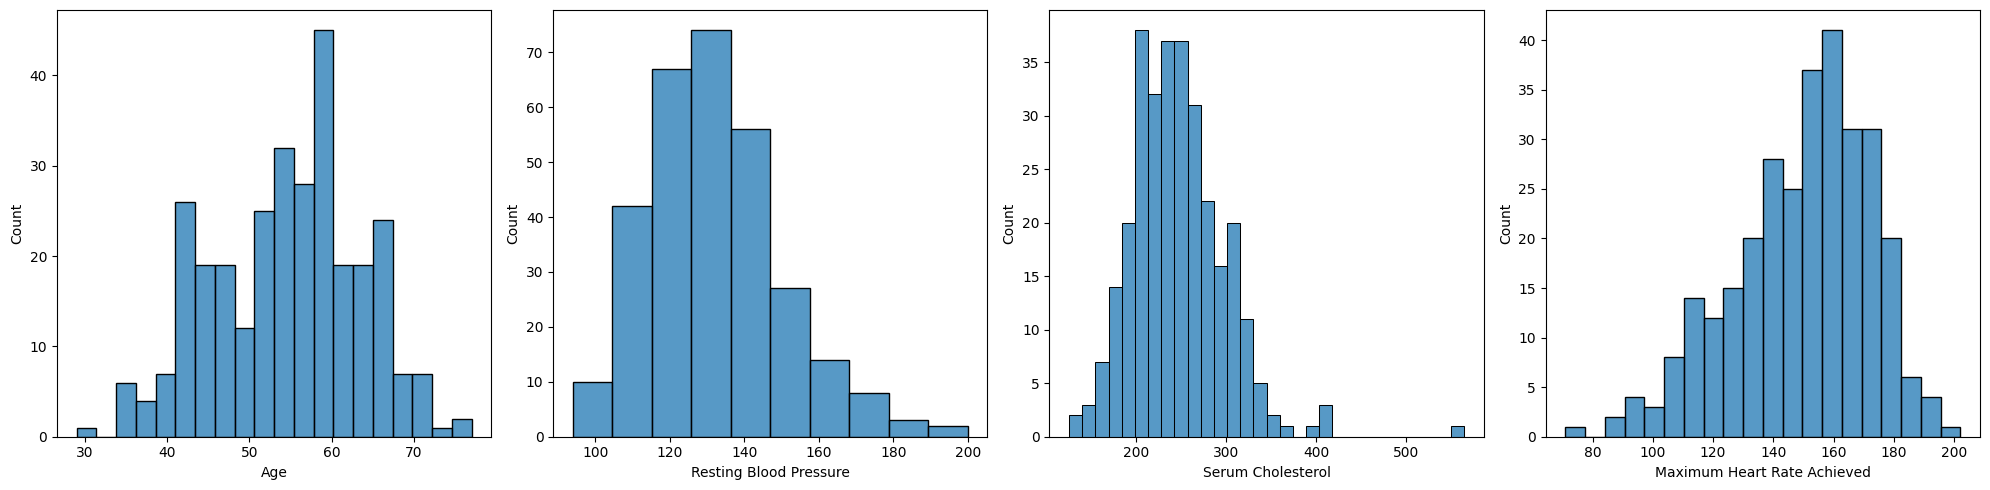

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the histograms for each variable
sns.histplot(df['age'], bins=20, ax=axes[0])
axes[0].set_xlabel('Age')

sns.histplot(df['trestbps'], bins=10, ax=axes[1])
axes[1].set_xlabel('Resting Blood Pressure')

sns.histplot(df['chol'], bins=30, ax=axes[2])
axes[2].set_xlabel('Serum Cholesterol')

sns.histplot(df['thalach'], bins=20, ax=axes[3])
axes[3].set_xlabel('Maximum Heart Rate Achieved')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Interpretation:**these histograms helps in gaining more understanding of the dataset's characteristics and identifying  relationships between these variables and the presence or absence of heart disease. This information is valuable for further analysis and modeling to predict heart disease risk

<ipython-input-12-2703a17ff7ca>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=['Healthy', 'Sick'])
<ipython-input-12-2703a17ff7ca>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=['No Angina', 'With Angina'])
<ipython-input-12-2703a17ff7ca>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
<ipython-input-12-2703a17ff7ca>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(labels=['L. Blood Sugar', 'H. Blood Sugar'])


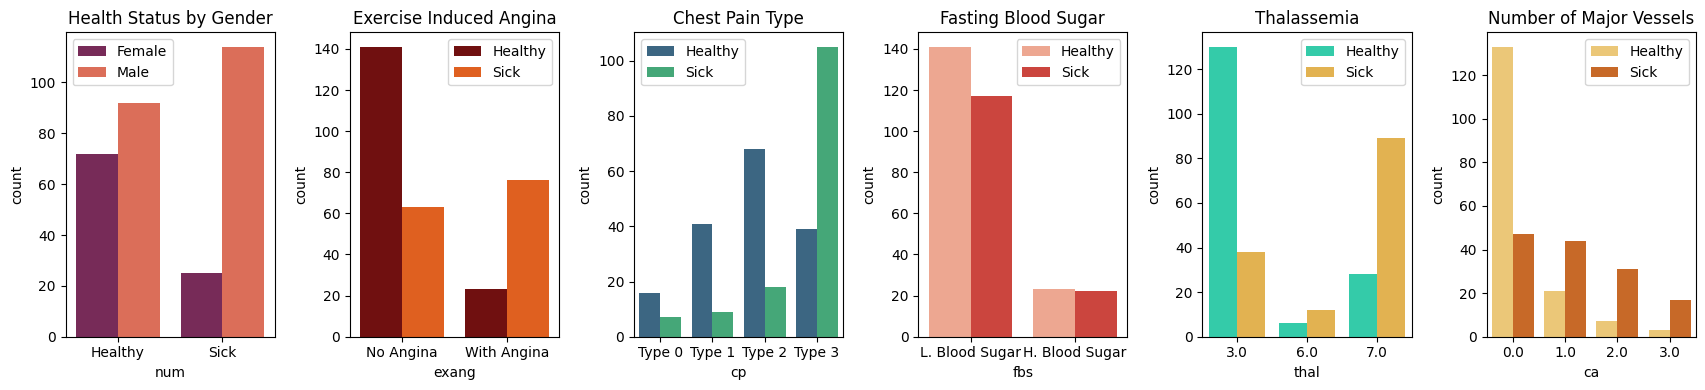

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

# Plot the countplots for each variable
sns.countplot(x='num', data=df, hue='sex', palette='rocket', ax=axes[0])
axes[0].set_xticklabels(labels=['Healthy', 'Sick'])
axes[0].legend(['Female', 'Male'])
axes[0].set_title('Health Status by Gender')

sns.countplot(x='exang', data=df, hue='num', palette='gist_heat', ax=axes[1])
axes[1].set_xticklabels(labels=['No Angina', 'With Angina'])
axes[1].legend(['Healthy', 'Sick'])
axes[1].set_title('Exercise Induced Angina')

sns.countplot(x='cp', data=df, hue='num', palette='viridis', ax=axes[2])
axes[2].set_xticklabels(labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
axes[2].legend(['Healthy', 'Sick'])
axes[2].set_title('Chest Pain Type')

sns.countplot(x='fbs', data=df, hue='num', palette='Reds', ax=axes[3])
axes[3].set_xticklabels(labels=['L. Blood Sugar', 'H. Blood Sugar'])
axes[3].legend(['Healthy', 'Sick'])
axes[3].set_title('Fasting Blood Sugar')

sns.countplot(x='thal', data=df, hue='num', palette='turbo', ax=axes[4])
axes[4].legend(['Healthy', 'Sick'])
axes[4].set_title('Thalassemia')

sns.countplot(x='ca', data=df, hue='num', palette='YlOrBr', ax=axes[5])
axes[5].legend(['Healthy', 'Sick'])
axes[5].set_title('Number of Major Vessels')

# Remove empty subplot
fig.delaxes(axes[6])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Interpretation:** we can gain a better understanding of how different categorical variables are related to the presence or absence of heart disease in the dataset. This information can be valuable for further analysis and predictive modeling to identify risk factors and develop strategies for prevention and treatment of heart disease.

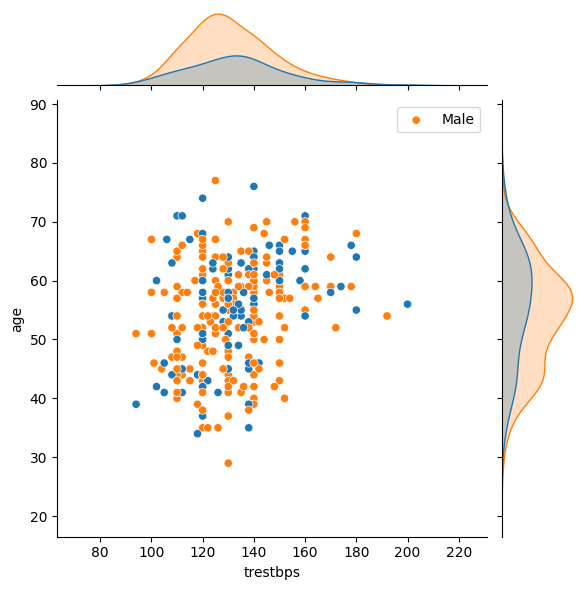

In [ ]:
sns.jointplot(data=df, x='trestbps', y='age', hue='sex', kind='scatter', legend=False)
plt.legend(labels=['Male' ,'Female'])

**Interpreatation:**visualizing these relationships, we can gain valuable insights into the cardiovascular health of individuals in the dataset and identify potential areas for further investigation or intervention.

##Exploring multidimensional correlations using PCA

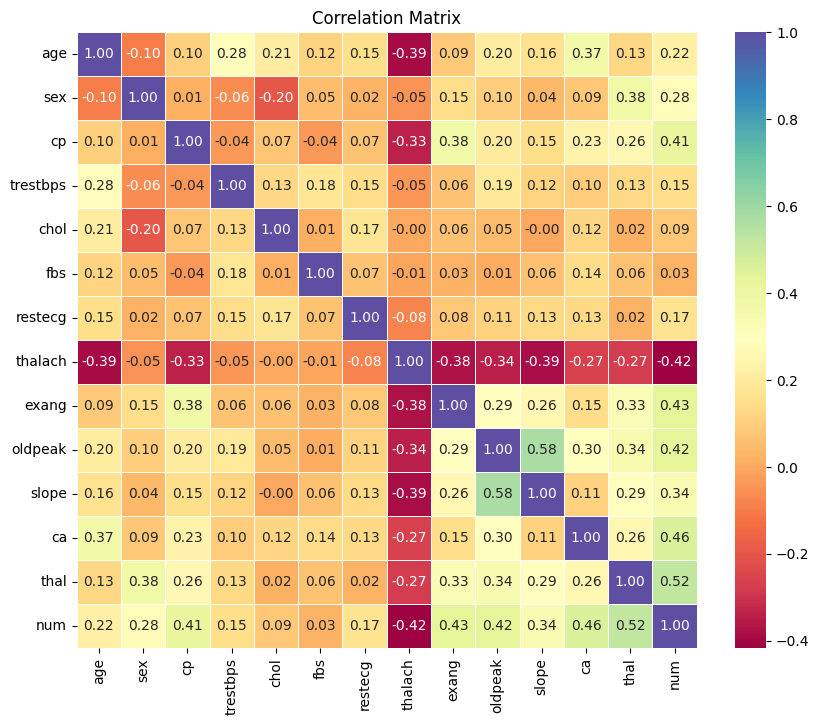

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# PCA with 3 components
pca = PCA(n_components=3)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_pca = pca.fit_transform(X_scaled)

# Calculate the correlation coefficients between principal components and original features
components_corr = np.corrcoef(X_scaled.T, X_pca.T)[:X_scaled.shape[1], X_scaled.shape[1]:]
print( "saturation matrix:")
print(components_corr)



saturation matrix:
[[ 0.45481341  0.56580592 -0.00089941]
 [ 0.24544337 -0.57464951  0.51671995]
 [ 0.51814944 -0.16136571 -0.45589346]
 [ 0.26464319  0.49283937  0.39291329]
 [ 0.14379158  0.54752274 -0.23754313]
 [ 0.11764522  0.25636784  0.58230308]
 [ 0.25247132  0.34592555  0.09128151]
 [-0.65956386 -0.00330977  0.27384998]
 [ 0.5909242  -0.22439284 -0.2165371 ]
 [ 0.67247839 -0.01036692  0.02486205]
 [ 0.58678361 -0.02958877 -0.01820627]
 [ 0.55513293  0.20767812  0.10162829]
 [ 0.63493879 -0.31622538  0.26941008]
 [ 0.79358957 -0.15006301  0.02960553]]


The above matrix represent the correlation coefficient between the initial variable and the our new base. In this case we have 3 principal component ( mathematically eigen values obtain from cofusion matrix )

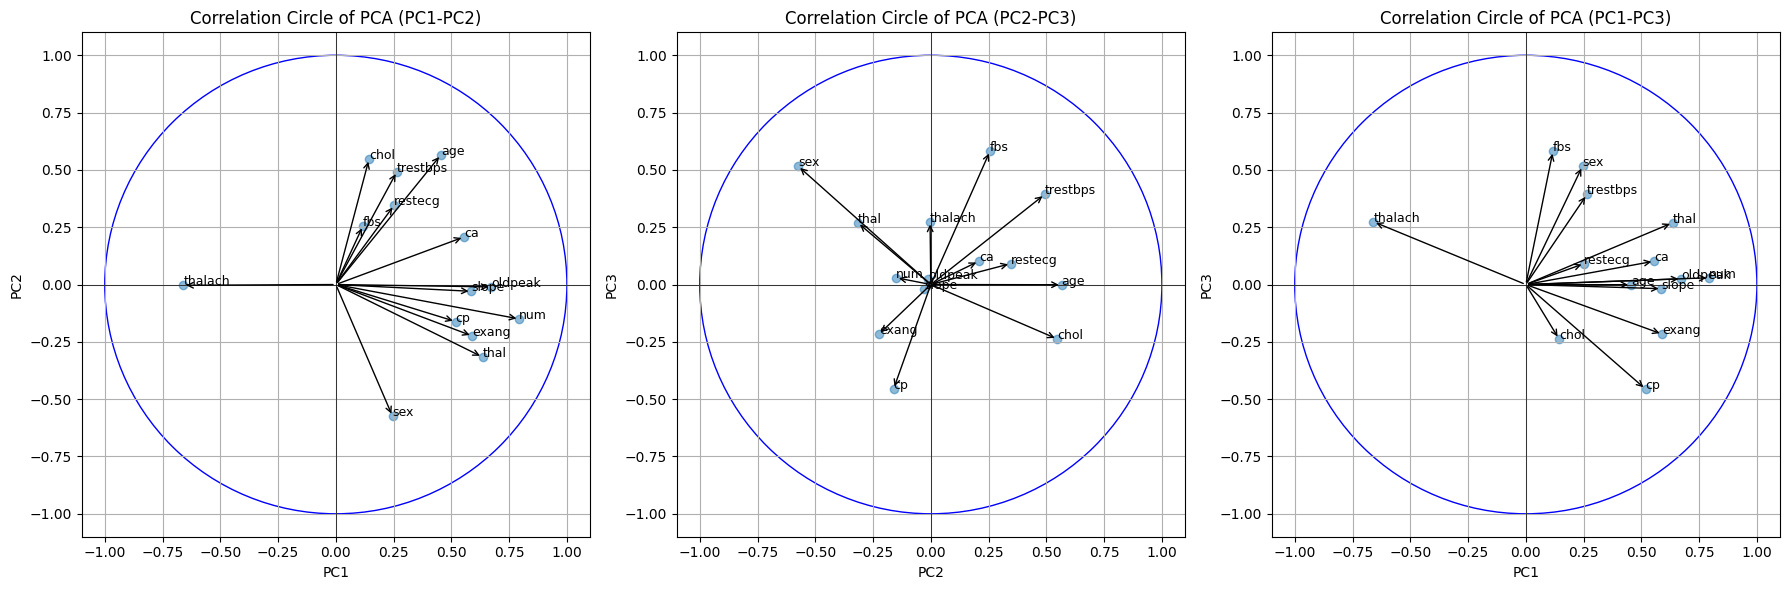

In [ ]:
# Plot the correlation circles for each pair of principal components
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        ax.scatter(components_corr[:, i], components_corr[:, i+1], alpha=0.5)
        ax.set_title(f'Correlation Circle of PCA (PC{i+1}-PC{i+2})')
        ax.set_xlabel(f'PC{i+1}')
        ax.set_ylabel(f'PC{i+2}')

        # Plot the correlation coefficients labels for each original feature
        for j, (x, y) in enumerate(zip(components_corr[:, i], components_corr[:, i+1])):
            ax.text(x, y, df.columns[j], fontsize=9)
            ax.annotate('', xy=(x, y), xytext=(0, 0), arrowprops=dict(facecolor='black', arrowstyle='->'))

        # Plot the unit circle
        circle = plt.Circle((0, 0), 1, color='blue', fill=False)
        ax.add_artist(circle)

        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
    elif i == 1:
        ax.scatter(components_corr[:, i], components_corr[:, i+1], alpha=0.5)
        ax.set_title(f'Correlation Circle of PCA (PC{i+1}-PC{i+2})')
        ax.set_xlabel(f'PC{i+1}')
        ax.set_ylabel(f'PC{i+2}')

        # Plot the correlation coefficients labels for each original feature
        for j, (x, y) in enumerate(zip(components_corr[:, i], components_corr[:, i+1])):
            ax.text(x, y, df.columns[j], fontsize=9)
            ax.annotate('', xy=(x, y), xytext=(0, 0), arrowprops=dict(facecolor='black', arrowstyle='->'))

        # Plot the unit circle
        circle = plt.Circle((0, 0), 1, color='blue', fill=False)
        ax.add_artist(circle)

        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
    elif i == 2:
        ax.scatter(components_corr[:, 0], components_corr[:, 2], alpha=0.5)
        ax.set_title(f'Correlation Circle of PCA (PC1-PC3)')
        ax.set_xlabel(f'PC1')
        ax.set_ylabel(f'PC3')

        # Plot the correlation coefficients labels for each original feature
        for j, (x, y) in enumerate(zip(components_corr[:, 0], components_corr[:, 2])):
            ax.text(x, y, df.columns[j], fontsize=9)
            ax.annotate('', xy=(x, y), xytext=(0, 0), arrowprops=dict(facecolor='black', arrowstyle='->'))

        # Plot the unit circle
        circle = plt.Circle((0, 0), 1, color='blue', fill=False)
        ax.add_artist(circle)

        ax.grid(True)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()


**Interpretation:** correlation circles help in identifying which original features contribute most to the principal components and understanding the relationships among features and principal components. They provide insights into the structure and patterns present in the data, aiding in dimensionality reduction, feature selection, and data interpretation in PCA.

*   Each point represents an original feature in the dataset.
*   The position of the points relative to the origin indicates the correlation between the original features and the principal components
*   The length of the vectors represents the importance of the original features in explaining the variance in the data.
* The direction of the vectors indicates the relationship between the original features and the principal components.
*   Features that are closer to each other or point in similar directions have higher correlations or similar contributions to the principal components.



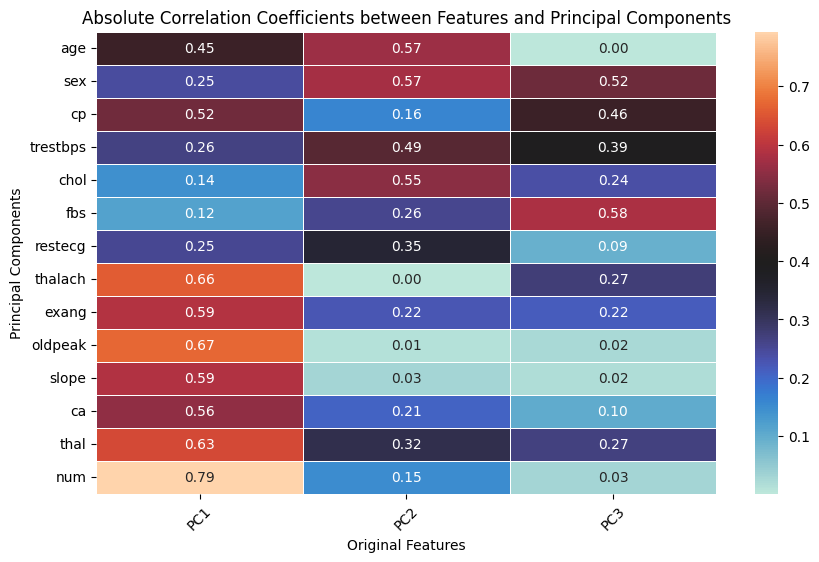

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df = pd.DataFrame(components_corr, columns=[f'PC{i+1}' for i in range(components_corr.shape[1])], index=df.columns)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.abs(), cmap='icefire', annot=True, fmt=".2f", linewidths=.5)
plt.title('Absolute Correlation Coefficients between Features and Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**interpretation**: the following diagram gives us the correlation between our feature and the ou principal component from this graph we can best know whixh feature is quite best represent in the new base this result base on

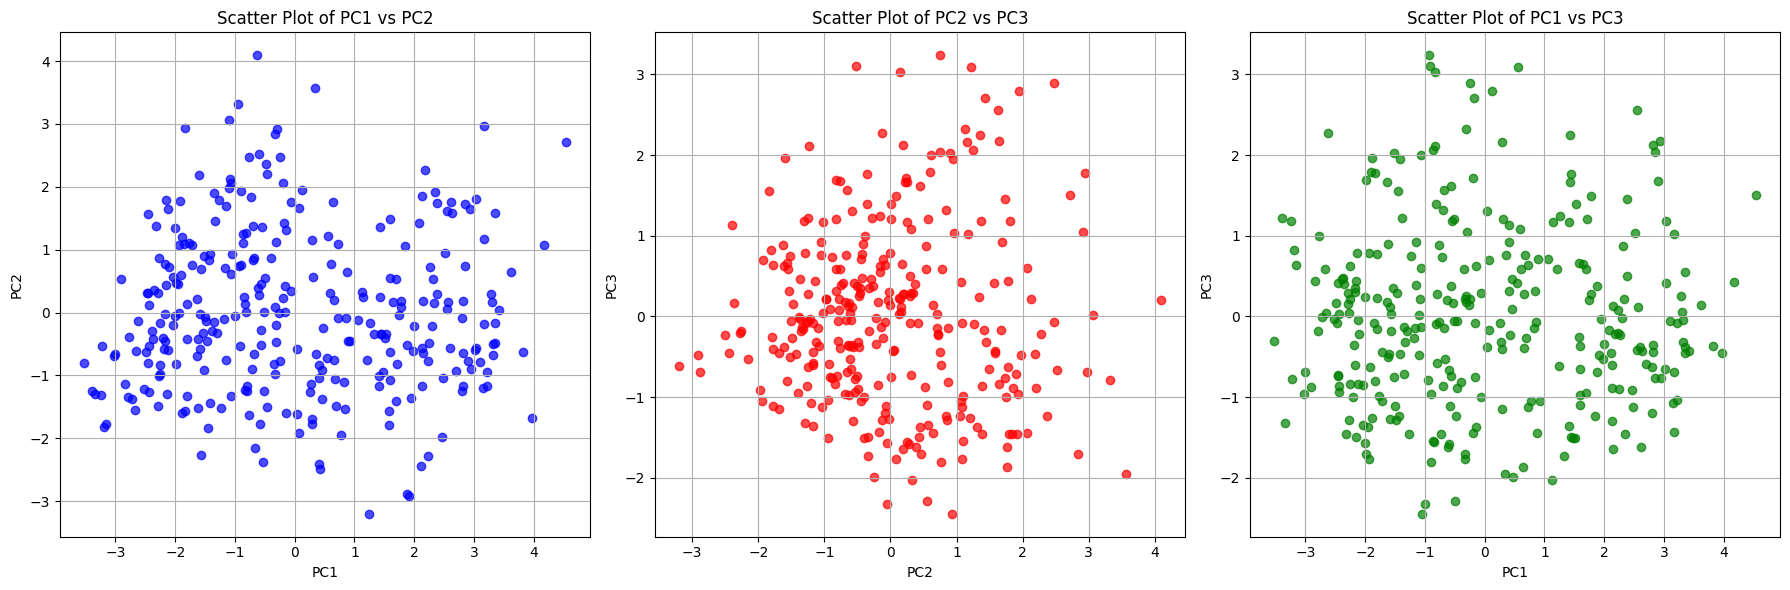

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot of PC1 vs PC2 (blue)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='blue')
axes[0].set_title('Scatter Plot of PC1 vs PC2')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Scatter plot of PC2 vs PC3 (red)
axes[1].scatter(X_pca[:, 1], X_pca[:, 2], alpha=0.7, color='red')
axes[1].set_title('Scatter Plot of PC2 vs PC3')
axes[1].set_xlabel('PC2')
axes[1].set_ylabel('PC3')
axes[1].grid(True)

# Scatter plot of PC1 vs PC3 (green)
axes[2].scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.7, color='green')
axes[2].set_title('Scatter Plot of PC1 vs PC3')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC3')
axes[2].grid(True)

plt.tight_layout()
plt.show()



**interpretation:** here we have a scatter plot representing the dimensionality reduction of our dataset in our new base

##CONCLUSION

**Dimensionality Reduction:** PCA successfully reduced the dimensionality of the dataset by transforming the original features into a new set of uncorrelated variables called principal components (PCs). This reduction in dimensionality helps in simplifying the dataset while retaining most of its variance.

**Variance Explained:** We observed how much variance each principal component explains in the data. This information is crucial for understanding the amount of information retained after dimensionality reduction.

**Correlation Circles:**The correlation circles provided insights into the relationships between the original features and the principal components. By analyzing the position, length, and direction of the vectors in the correlation circles, we gained an understanding of which original features contribute most to each principal component and how they relate to each other.

**Interpretation of Principal Components:** Through the correlation circles and analysis of the loadings (correlation coefficients), we were able to interpret the principal components in terms of the original features. This interpretation aids in understanding the underlying structure or patterns in the data.

**Feature Selection:** PCA can assist in feature selection by identifying the most important features that contribute to the variance in the data. Features with high loadings on principal components are considered important contributors, while features with low loadings may be less relevant and can potentially be excluded from further analysis